<a href="https://colab.research.google.com/github/xteox017/Sintesis-de-reuniones-con-IA-Equipo-31-TEC/blob/main/Avance3_Equipo31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maestría en Inteligencia Artificial Aplicada**

PROYECTO INTEGRADOR

Avance 3. Baseline

Equipo 31

JUAN CARLOS VILLAMIL ROJAS A01794003

MATEO CRUZ LANCHERO A01793882

ANDREA MARGARITA OSORIO GONZÁLEZ A01104776

19/5/2024

**texto en negrita** **Avance #3**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Paso 1: Carga de datos y preprocesamiento
Transcripciones preprocesadas:
Transcripción 1:
35 jóvenes envía 100 mensajes día contacto físico cara cara cómo vas conectar gente regla pareto llevada conversación 8020 importante monopolizar conversación to sabas leyendo libro estudio demostró tipo preguntas abiertas llevan conversaciones profundas significativas valioso libro comentaba steve allen da framework ser mejor conversador incluso conversación difíciles conversar jefe hablas conversaciones difíciles leo libro llama crucial conversations libro da tips cómo conversar situación cotidiana sino conversación música difícil tal gente cómo podcast buscamos rebotar ideas formato 15 20 minutos acerca temas buscan ayudarnos ser mejores personal profesionalmente día hoy tema bien interesante cómo ser mejor conversador ahora traigo pequeño estudio dato bien paja vamos ver opinas gonzalo mira 35 jóvenes envían 100 mensajes día alguna manera ves locura reemplazando conversaciones presenciales cua

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Mejores umbrales: (5, 10)
Paso 5: Entrenamiento y evaluación del modelo final
Accuracy: 0.7500
Precision: 0.7500
Recall: 1.0000
F1 Score: 0.8571


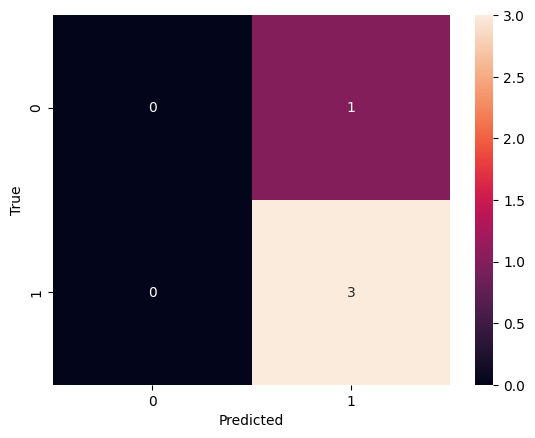

Palabras clave relevantes según Chi-cuadrado: ['000' '1' '10' '100' '15' '19' '2' '20' '3' '30' '5' '50' '6' '7' '80'
 'abigail' 'acceso' 'acerca' 'acercamiento' 'actividad' 'actividades'
 'actualmente' 'acuerdo' 'acá' 'además' 'administración' 'afecta']


In [7]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def load_transcriptions(data_path):
    archivos = [f for f in os.listdir(data_path) if f.endswith('.txt')]
    transcripciones = []
    for archivo in archivos:
        with open(os.path.join(data_path, archivo), 'r', encoding='utf-8') as f:
            texto = f.read()
            transcripciones.append(texto)
    return transcripciones

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    return ' '.join(tokens)

print("Paso 1: Carga de datos y preprocesamiento")
data_path = '/content/drive/My Drive/Transcriptions/'
transcripciones = load_transcriptions(data_path)

stop_words = set(stopwords.words('spanish'))
stop_words.update(['eh', 'si', 'va', 'pues', 'entonces', '...', '.', ',', ''])

transcripciones_preprocesadas = []
for texto in transcripciones:
    texto_preprocesado = preprocess_text(texto)
    transcripciones_preprocesadas.append(texto_preprocesado)

# Imprimir las transcripciones preprocesadas
print("Transcripciones preprocesadas:")
for i, transcripcion in enumerate(transcripciones_preprocesadas, start=1):
    print(f"Transcripción {i}:")
    print(transcripcion)
    print()

# Guardar las transcripciones preprocesadas en un archivo
with open('transcripciones_preprocesadas.txt', 'w', encoding='utf-8') as f:
    for i, transcripcion in enumerate(transcripciones_preprocesadas, start=1):
        f.write(f"Transcripción {i}:\n")
        f.write(transcripcion)
        f.write("\n\n")

print("Paso 2: Vectorización TF-IDF")
tfidf_vectorizer = TfidfVectorizer(max_features=1000, token_pattern=r'\b\w+\b', ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(transcripciones_preprocesadas)

print("Paso 3: Cálculo de frecuencia de palabras por reunión")
frecuencia_palabras_por_reunion = []
for texto_preprocesado in transcripciones_preprocesadas:
    tokens = texto_preprocesado.split()
    frecuencia_palabras_reunion = Counter(tokens)
    frecuencia_palabras_por_reunion.append(frecuencia_palabras_reunion)

df_frecuencias = pd.DataFrame(frecuencia_palabras_por_reunion)
df_frecuencias = df_frecuencias.fillna(0)
varianzas = df_frecuencias.var()
palabras_clave = varianzas.sort_values(ascending=False).index[:10]

print("Paso 4: Búsqueda de mejores umbrales")
parametros_umbral = {
    'umbral_bajo': [3, 5, 7],
    'umbral_medio': [10, 12, 15]
}

mejor_accuracy = 0
mejor_umbrales = None

for umbral_bajo in parametros_umbral['umbral_bajo']:
    for umbral_medio in parametros_umbral['umbral_medio']:
        frecuencia_palabras_clave = []
        for frecuencia_palabras_reunion in frecuencia_palabras_por_reunion:
            frecuencia_palabras_clave_reunion = sum(frecuencia_palabras_reunion[palabra] for palabra in palabras_clave)
            frecuencia_palabras_clave.append(frecuencia_palabras_clave_reunion)

        df_features = pd.DataFrame()
        df_features['frecuencia_palabras_clave'] = frecuencia_palabras_clave
        df_features['clasificacion'] = pd.cut(df_features['frecuencia_palabras_clave'], bins=[0, umbral_bajo, umbral_medio, np.inf], labels=['Bajo', 'Medio', 'Alto'])

        selector_varianza = VarianceThreshold(threshold=0.005)
        tfidf_matrix_varianza = selector_varianza.fit_transform(tfidf_matrix)

        target = df_features['clasificacion'] == 'Alto'
        selector_chi2 = SelectKBest(chi2, k='all')
        selector_chi2.fit(tfidf_matrix_varianza, target)
        features_seleccionadas_chi2 = selector_chi2.transform(tfidf_matrix_varianza)

        palabras_seleccionadas_chi2 = tfidf_vectorizer.get_feature_names_out()[selector_chi2.get_support(indices=True)]

        df_features['target'] = np.where(df_features['clasificacion'] == 'Alto', 1, 0)

        X_train, X_test, y_train, y_test = train_test_split(features_seleccionadas_chi2, df_features['target'], test_size=0.2, random_state=42)

        modelos = [
            LogisticRegression(),
            MultinomialNB(),
            SVC(),
            DecisionTreeClassifier()
        ]

        mejor_modelo = None
        mejor_accuracy_modelo = 0

        for modelo in modelos:
            kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            accuracies = []

            for train_index, val_index in kfold.split(X_train, y_train):
                X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                y_train_fold, y_val_fold = y_train.values[train_index], y_train.values[val_index]

                modelo.fit(X_train_fold, y_train_fold)
                y_pred_val = modelo.predict(X_val_fold)
                accuracy = accuracy_score(y_val_fold, y_pred_val)
                accuracies.append(accuracy)

            accuracy_promedio = np.mean(accuracies)

            if accuracy_promedio > mejor_accuracy_modelo:
                mejor_accuracy_modelo = accuracy_promedio
                mejor_modelo = modelo

        if mejor_accuracy_modelo > mejor_accuracy:
            mejor_accuracy = mejor_accuracy_modelo
            mejor_umbrales = (umbral_bajo, umbral_medio)

print(f"Mejores umbrales: {mejor_umbrales}")

print("Paso 5: Entrenamiento y evaluación del modelo final")
frecuencia_palabras_clave = []
for frecuencia_palabras_reunion in frecuencia_palabras_por_reunion:
    frecuencia_palabras_clave_reunion = sum(frecuencia_palabras_reunion[palabra] for palabra in palabras_clave)
    frecuencia_palabras_clave.append(frecuencia_palabras_clave_reunion)

df_features = pd.DataFrame()
df_features['frecuencia_palabras_clave'] = frecuencia_palabras_clave
df_features['clasificacion'] = pd.cut(df_features['frecuencia_palabras_clave'], bins=[0, mejor_umbrales[0], mejor_umbrales[1], np.inf], labels=['Bajo', 'Medio', 'Alto'])

target = df_features['clasificacion'] == 'Alto'
selector_chi2 = SelectKBest(chi2, k='all')
selector_chi2.fit(tfidf_matrix_varianza, target)
features_seleccionadas_chi2 = selector_chi2.transform(tfidf_matrix_varianza)

palabras_seleccionadas_chi2 = tfidf_vectorizer.get_feature_names_out()[selector_chi2.get_support(indices=True)]

df_features['target'] = np.where(df_features['clasificacion'] == 'Alto', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(features_seleccionadas_chi2, df_features['target'], test_size=0.2, random_state=42)

mejor_modelo.fit(X_train, y_train)
y_pred = mejor_modelo.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(f"Palabras clave relevantes según Chi-cuadrado: {palabras_seleccionadas_chi2}")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
